# Teste Para Data Science Elo
## Implementação do teste técnico

## 1 - Primeiro checar as informações do dataset:

#### - importa os módulos padrão para o início das análises:

In [386]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### - Leitura do dataset:

In [387]:
df = pd.read_csv(r'elo7_recruitment_dataset.csv', delimiter=',')

#### - Para verificação dos dados do dataset e as 5 primeiras linhas:

In [388]:
df.head()

product_id  seller_id                                query  search_page  \
0    11394449    8324141                       espirito santo            2   
1    15534262    6939286                     cartao de visita            2   
2    16153119    9835835                expositor de esmaltes            1   
3    15877252    8071206  medidas lencol para berco americano            1   
4    15917108    7200773                 adesivo box banheiro            3   

   position                                 title  \
0         6                Mandala Espírito Santo   
1         0                      Cartão de Visita   
2        38  Organizador expositor p/ 70 esmaltes   
3         6        Jogo de Lençol Berço Estampado   
4        38               ADESIVO BOX DE BANHEIRO   

                                   concatenated_tags        creation_date  \
0                                        mandala mdf  2015-11-14 19:42:12   
1  cartao visita panfletos tag adesivos copos lon...  2018-04-04 20:55:07   
2                                          expositor  2018-10-13 20:57:07   
3                  t jogo lencol menino lencol berco  2017-02-27 13:26:03   
4                               adesivo box banheiro  2017-05-09 13:18:38   

        price  weight  express_delivery  minimum_quantity  view_counts  \
0  171.890000  1200.0                 1                 4          244   
1   77.670000     8.0                 1                 5          124   
2   73.920006  2709.0                 1                 1           59   
3  118.770004     0.0                 1                 1          180   
4  191.810000   507.0                 1                 6           34   

   order_counts     category  
0           NaN    Decoração  
1           NaN  Papel e Cia  
2           NaN       Outros  
3           1.0         Bebê  
4           NaN    Decoração

Segue as informações das colunas do:

- product_id - identificação de produto
- seller_id - identificação do vendedor
- query - termo de busca inserido pelo usuário
- search_page - número da página que o produto apareceu nos resultados de busca (mín 1 e máx 5)
- position - número da posição que o produto apareceu dentro da página de busca (mín 0 e máx 38)
- title - título do produto
- concatenated_tags - tags do produto inseridas pelo vendedor (as tags estão concatenadas por espaço)
- creation_date - data de criação do produto na plataforma do Elo7
- price - preço do produto em reais
- weight - peso em gramas da unidade do produto reportado pelo vendedor
- express_delivery - indica se o produto é pronta entrega (1) ou não (0)
- minimum_quantity - quantidade de unidades mínima necessária para compra
- view_counts - número de cliques no produto nos últimos três meses
- order_counts - número de vezes que o produto foi comprado nos últimos três meses
- category - categoria do produto

#### - Para verificar informações e os tipos de dados presentes no dataset:

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38507 entries, 0 to 38506
Data columns (total 15 columns):
product_id           38507 non-null int64
seller_id            38507 non-null int64
query                38507 non-null object
search_page          38507 non-null int64
position             38507 non-null int64
title                38507 non-null object
concatenated_tags    38505 non-null object
creation_date        38507 non-null object
price                38507 non-null float64
weight               38449 non-null float64
express_delivery     38507 non-null int64
minimum_quantity     38507 non-null int64
view_counts          38507 non-null int64
order_counts         18117 non-null float64
category             38507 non-null object
dtypes: float64(3), int64(7), object(5)
memory usage: 4.4+ MB


**- Pode se observar que:**
- a coluna 'order_counts' tem apenas 18117 linhas, enquanto a maioria das colunas estão completas com 38507. 
- a coluna 'weight' também tem 38449 linhas.
- a coluna 'concatenated_tags' tem 2 linhas faltantes.
 
#### Trataremos essas inconsistências em breve.

#### - Para uma descrição estatística mais rápida e detalhada das colunas numéricas:

In [390]:
df.describe().T

count          mean           std     min         25%  \
product_id        38507.0  8.342724e+06  4.834912e+06  361.00  4142514.00   
seller_id         38507.0  5.009902e+06  2.947791e+06  817.00  2472772.00   
search_page       38507.0  1.491885e+00  9.805703e-01    1.00        1.00   
position          38507.0  1.688901e+01  1.158853e+01    0.00        6.00   
price             38507.0  8.405416e+01  2.118053e+02    0.07       12.75   
weight            38449.0  3.618367e+02  1.820815e+03    0.00        6.00   
express_delivery  38507.0  7.806373e-01  4.138202e-01    0.00        1.00   
minimum_quantity  38507.0  1.459657e+01  4.376894e+01    0.00        3.00   
view_counts       38507.0  5.455205e+02  1.416509e+03    1.00      119.00   
order_counts      18117.0  2.738141e+01  6.053336e+01    1.00        8.00   

                         50%         75%          max  
product_id        8375490.00  12530894.0  16692953.00  
seller_id         4917720.00   7640886.0  10118868.00  
search_page             1.00         2.0         5.00  
position               16.00        27.0        38.00  
price                  28.49        90.0     11509.38  
weight                  9.00       107.0     65009.00  
express_delivery        1.00         1.0         1.00  
minimum_quantity        7.00        16.0      3000.00  
view_counts           242.00       521.0     45010.00  
order_counts           15.00        26.0      2460.00

_________________________________________________________________________________________

## 2 - Após, será realizada a limpeza dos dados:

### - extração de colunas que não serão relevantes para o problema:

A princípio remover apenas as colunas dos índices e da data de criação, conforme for realizando a análise, reavaliar se há necessidade de remover outras colunas:

In [391]:
df = df.drop(['product_id','seller_id', 'creation_date'], axis=1)

Para verificar se as colunas foram devidamentes removidas:

In [392]:
df.columns

Index(['query', 'search_page', 'position', 'title', 'concatenated_tags',
       'price', 'weight', 'express_delivery', 'minimum_quantity',
       'view_counts', 'order_counts', 'category'],
      dtype='object')

#### - verificar os tipos de dados e reagrupá-las, para facilitar a remoção dos outliers.

*Outliers* são valores que desequilibram o dataframe e comprometem a capacidade de extrair insights com base nos dados.
Para isso as colunas foram reagrupados por tipo e foi criado uma função para excluir os outliers do nosso dataset

In [393]:
df.dtypes

query                 object
search_page            int64
position               int64
title                 object
concatenated_tags     object
price                float64
weight               float64
express_delivery       int64
minimum_quantity       int64
view_counts            int64
order_counts         float64
category              object
dtype: object

In [394]:
float_cols = ['price', 'weight', 'order_counts']

#categoria_cols = ['query', 'concatenated_tags', 'title']

int_cols = ['search_page', 'position', 'express_delivery', 'minimum_quantity', 'view_counts']
 
def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 
to_type(df, float_cols, 'float64')
to_type(df, int_cols, 'int64') 
#to_type(df, categorical_cols, 'category')



In [395]:
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [396]:
for col in float_cols:
  exclui_outliers(df, col)

In [397]:
for col in int_cols:
  exclui_outliers(df, col)

#### - verificação dos dados faltantes ou dados NaN:

In [398]:
df.isnull().sum()

query                    0
search_page           1051
position                 0
title                    0
concatenated_tags        2
price                  475
weight                 490
express_delivery         0
minimum_quantity       147
view_counts            477
order_counts         20665
category                 0
dtype: int64

Conforme previsto na visualização das informações do dataset, confirmamos com esse comando que há dados faltantes.
Como retiramos os outliers também, o número de colunas com dados faltantes aumentaram.

**Como tratá-los:**

In [399]:
print('média:',df['search_page'].mean())
print('mediana:',df['search_page'].median())
print('moda:',df['search_page'].mode()[0])

média: 1.393448312686886
mediana: 1.0
moda: 1.0


Como os valores de mediana e moda são iguais, preenchi os dados do número das páginas faltantes com a moda.

In [400]:
df['search_page'] = df['search_page'].fillna(df['search_page'].mode()[0])

In [401]:
print('média:',df['price'].mean())
print('mediana:',df['price'].median())
print('moda:',df['price'].mode()[0])

média: 68.98087294507258
mediana: 27.6
moda: 12.0


Como os valores foram bem diferentes, foi escolhido a mediana, para preencher os dados faltantes dos preços.

In [402]:
df['price'] = df['price'].fillna(df['price'].median())

In [403]:
print('média:',df['weight'].mean())
print('mediana:',df['weight'].median())
print('moda:',df['weight'].mode()[0])

média: 220.40271457505852
mediana: 9.0
moda: 0.0


Mais uma vez os valores foram bem diferentes, foi escolhido a mediana, para preencher os dados faltantes do peso dos produtos.

In [404]:
df['weight'] = df['weight'].fillna(df['weight'].median())

In [405]:
print('média:',df['minimum_quantity'].mean())
print('mediana:',df['minimum_quantity'].median())
print('moda:',df['minimum_quantity'].mode()[0])

média: 12.822471324296142
mediana: 7.0
moda: 1.0


Para a quantidade mínima foi escolhido a mediana, para preencher os dados faltantes.

In [406]:
df['minimum_quantity'] = df['minimum_quantity'].fillna(df['minimum_quantity'].median())

In [407]:
print('média:',df['view_counts'].mean())
print('mediana:',df['view_counts'].median())
print('moda:',df['view_counts'].mode()[0])

média: 434.99997370496976
mediana: 238.0
moda: 97.0


Para o número de cliques no produto nos últimos três meses, foi utilizado a mediana também, para preenchimento de dados faltantes.

In [408]:
df['view_counts'] = df['view_counts'].fillna(df['view_counts'].median())

In [409]:
print('média:',df['order_counts'].mean())
print('mediana:',df['order_counts'].median())
print('moda:',df['order_counts'].mode()[0])

média: 21.88218809550499
mediana: 15.0
moda: 1.0


Como a coluna 'order_counts' tem mais da metade de dados faltantes e os seus valores são do tipo NaN, não numéricos, iremos substituir pela mediana.


In [411]:
df['order_counts'] = df['order_counts'].fillna(df['order_counts'].median())

Como a coluna 'concatenated_tags' é categórica, foi inputado o dado 'Sem Tag'

In [413]:
df['concatenated_tags'] = df['concatenated_tags'].fillna('Sem Tag')

Verificar se os dados foram inputados corretamente:

In [415]:
df.isnull().sum()

query                0
search_page          0
position             0
title                0
concatenated_tags    0
price                0
weight               0
express_delivery     0
minimum_quantity     0
view_counts          0
order_counts         0
category             0
dtype: int64

#### - Transformar as colunas categóricas em números, para poder fazer correlação com elas e também rodar o modelo

Como as colunas 'concatenated_tags', 'title' e 'query', tem muitos valores únicos, foi utilizado a ferramenta de extração Feature Hasher, que transforma os dados categoricos em números.

In [416]:
 from sklearn.feature_extraction import FeatureHasher

In [417]:
df.head()

query  search_page  position  \
0                       espirito santo          2.0       6.0   
1                     cartao de visita          2.0       0.0   
2                expositor de esmaltes          1.0      38.0   
3  medidas lencol para berco americano          1.0       6.0   
4                 adesivo box banheiro          3.0      38.0   

                                  title  \
0                Mandala Espírito Santo   
1                      Cartão de Visita   
2  Organizador expositor p/ 70 esmaltes   
3        Jogo de Lençol Berço Estampado   
4               ADESIVO BOX DE BANHEIRO   

                                   concatenated_tags       price  weight  \
0                                        mandala mdf  171.890000  1200.0   
1  cartao visita panfletos tag adesivos copos lon...   77.670000     8.0   
2                                          expositor   73.920006  2709.0   
3                  t jogo lencol menino lencol berco  118.770004     0.0   
4                               adesivo box banheiro  191.810000   507.0   

   express_delivery  minimum_quantity  view_counts  order_counts     category  
0               1.0               4.0        244.0          15.0    Decoração  
1               1.0               5.0        124.0          15.0  Papel e Cia  
2               1.0               1.0         59.0          15.0       Outros  
3               1.0               1.0        180.0           1.0         Bebê  
4               1.0               6.0         34.0          15.0    Decoração

In [418]:
df.dtypes

query                 object
search_page          float64
position             float64
title                 object
concatenated_tags     object
price                float64
weight               float64
express_delivery     float64
minimum_quantity     float64
view_counts          float64
order_counts         float64
category              object
dtype: object

In [477]:
tag = FeatureHasher(n_features=10, input_type='string')
sp = tag.fit_transform(df['concatenated_tags'])
df1 = pd.DataFrame(sp.toarray(), columns=['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6',
                                         'tag7', 'tag8', 'tag9', 'tag10'])

In [478]:
titulo = FeatureHasher(n_features=10, input_type='string')
transf = titulo.fit_transform(df['title'])
df2 = pd.DataFrame(transf.toarray(), columns=['title1', 'title2', 'title3', 'title4',
                                              'title5', 'title6', 'title7', 'title8',
                                              'title9','title10'])

In [479]:
busca = FeatureHasher(n_features=7, input_type='string')
busca_t = busca.fit_transform(df['query'])
df3 = pd.DataFrame(busca_t.toarray(), columns=['query1', 'query2', 'query3', 'query4',
                                               'query5', 'query6', 'query7'])

In [480]:
data = pd.concat([df, df1, df2, df3], axis=1)

In [481]:
data.head()

query  search_page  position  \
0                       espirito santo            2         6   
1                     cartao de visita            2         0   
2                expositor de esmaltes            1        38   
3  medidas lencol para berco americano            1         6   
4                 adesivo box banheiro            3        38   

                                  title  \
0                Mandala Espírito Santo   
1                      Cartão de Visita   
2  Organizador expositor p/ 70 esmaltes   
3        Jogo de Lençol Berço Estampado   
4               ADESIVO BOX DE BANHEIRO   

                                   concatenated_tags  price  weight  \
0                                        mandala mdf    171    1200   
1  cartao visita panfletos tag adesivos copos lon...     77       8   
2                                          expositor     73    2709   
3                  t jogo lencol menino lencol berco    118       0   
4                               adesivo box banheiro    191     507   

   express_delivery  minimum_quantity  view_counts  ...  title8 title9  \
0                 1                 4          244  ...     1.0   -1.0   
1                 1                 5          124  ...     0.0    0.0   
2                 1                 1           59  ...     0.0    1.0   
3                 1                 1          180  ...     1.0    0.0   
4                 1                 6           34  ...     2.0   -1.0   

   title10  query1  query2  query3  query4  query5  query6  query7  
0     -2.0     1.0    -3.0     2.0     0.0     1.0    -3.0     0.0  
1      0.0     2.0    -1.0     1.0     0.0     3.0    -2.0    -1.0  
2     -1.0     2.0    -2.0     6.0     0.0     4.0    -3.0     0.0  
3      3.0     4.0    -1.0     4.0    -1.0    10.0    -1.0     0.0  
4      3.0     2.0    -2.0     3.0    -2.0     4.0     0.0    -1.0  

[5 rows x 39 columns]

In [482]:
data.tag2.value_counts()

-2.0      6948
-1.0      5407
-3.0      4684
-4.0      3791
 0.0      3598
-5.0      2855
-6.0      2278
-7.0      1749
-8.0      1316
-9.0      1000
-10.0      795
-11.0      696
-12.0      582
-13.0      379
-14.0      376
-15.0      311
-16.0      287
-17.0      211
-18.0      169
-19.0      131
-20.0      117
-21.0      105
 1.0        90
-22.0       80
-25.0       65
 2.0        55
-24.0       44
-28.0       42
-26.0       41
-23.0       33
-30.0       27
-27.0       26
-29.0       25
-35.0       23
-31.0       18
-32.0       17
-41.0       12
-33.0       11
-54.0       11
-36.0       11
-34.0       10
-39.0        9
-37.0        9
-40.0        8
-43.0        7
-48.0        7
-42.0        5
-45.0        5
-93.0        5
-53.0        4
-46.0        4
 4.0         3
-44.0        3
-38.0        3
-49.0        2
-51.0        2
-47.0        2
 3.0         1
-292.0       1
-71.0        1
Name: tag2, dtype: int64

Como o coluna 'category' tem poucos valores únicos. Será setado os valores manualmente na próxima etapa.

## 3 - Formulação de questionamentos e Análise exploratória do dataset para respondê-los:

#### - Qual é meu atributo chave para responder as minhas perguntas?

Como queremos um classificador de categorias, a coluna 'category' é que preenche os requisistos para a criação do model.
Para isso, vamos transformá-la de categoria para int, pois assim, na geração dos modelos preditivos fica melhor.


In [483]:
data['category'].unique()

array(['Decoração', 'Papel e Cia', 'Outros', 'Bebê', 'Lembrancinhas',
       'Bijuterias e Jóias'], dtype=object)

Para verificar os valores e proporção das categorias dos produtos

<AxesSubplot:ylabel='category'>

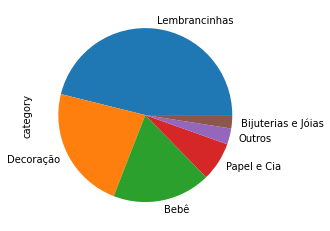

In [484]:
data['category'].value_counts().plot.pie()

In [485]:
data.loc[data["category"] == 'Decoração',"category",] = 0
data.loc[data["category"] == 'Papel e Cia',"category",] = 1
data.loc[data["category"] == 'Outros',"category",] = 2
data.loc[data["category"] == 'Bebê',"category",] = 3 
data.loc[data["category"] == 'Lembrancinhas',"category",] = 4
data.loc[data["category"] == 'Bijuterias e Jóias',"category",] = 5

In [486]:
data.columns

Index(['query', 'search_page', 'position', 'title', 'concatenated_tags',
       'price', 'weight', 'express_delivery', 'minimum_quantity',
       'view_counts', 'order_counts', 'category', 'tag1', 'tag2', 'tag3',
       'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9', 'tag10', 'title1',
       'title2', 'title3', 'title4', 'title5', 'title6', 'title7', 'title8',
       'title9', 'title10', 'query1', 'query2', 'query3', 'query4', 'query5',
       'query6', 'query7'],
      dtype='object')

#### - Existem correlação entre os atributos?

In [487]:
correlacoes = data.corr()

In [488]:
correlacoes

search_page  position     price    weight  express_delivery  \
search_page          1.000000  0.048087 -0.025764 -0.012623          0.029144   
position             0.048087  1.000000  0.001586 -0.000480          0.000127   
price               -0.025764  0.001586  1.000000  0.320424         -0.094607   
weight              -0.012623 -0.000480  0.320424  1.000000         -0.117338   
express_delivery     0.029144  0.000127 -0.094607 -0.117338          1.000000   
minimum_quantity     0.051814  0.011384 -0.305369 -0.162171          0.177695   
view_counts         -0.032959 -0.101707  0.011709  0.003044          0.008577   
order_counts        -0.004368 -0.050178 -0.013424  0.027334         -0.038631   
category             0.097325  0.025515 -0.300791 -0.267317          0.136864   
tag1                 0.016409 -0.031850 -0.064985 -0.040807          0.027734   
tag2                -0.041934  0.025721  0.014013  0.012151         -0.024561   
tag3                 0.020113 -0.034632 -0.023383  0.000575          0.008656   
tag4                -0.008648 -0.028968  0.025583  0.036866         -0.003711   
tag5                -0.037395  0.020439  0.103222  0.069493         -0.068421   
tag6                -0.011012 -0.028206  0.059174  0.063911         -0.024629   
tag7                 0.039863 -0.004092 -0.047834 -0.053953          0.035315   
tag8                 0.007527  0.025177  0.055311  0.019213         -0.023930   
tag9                -0.000986 -0.000971 -0.016092 -0.007616         -0.001815   
tag10                0.041378  0.002398  0.071688  0.041555          0.005367   
title1               0.025174  0.024488 -0.029539  0.011604         -0.038491   
title2              -0.054504 -0.037488  0.100133  0.020410          0.007743   
title3              -0.009948  0.032259  0.080942  0.112490         -0.128189   
title4              -0.016190  0.018758  0.071511  0.077485         -0.064924   
title5              -0.042955 -0.008005  0.101312  0.072678         -0.058669   
title6              -0.036553 -0.000917  0.140225  0.116004         -0.106446   
title7               0.031861  0.020779 -0.017936 -0.002475         -0.021332   
title8               0.000734 -0.009915  0.039042  0.006543          0.022404   
title9              -0.023372 -0.013191  0.053451  0.005691          0.011211   
title10              0.007881  0.011411  0.082235  0.043957         -0.029239   
query1              -0.156755 -0.032156  0.009024 -0.000066         -0.007445   
query2              -0.014190 -0.005940  0.147280  0.082533         -0.065325   
query3              -0.082071 -0.019389  0.136594  0.089385         -0.042034   
query4               0.016068 -0.005019  0.052672  0.032683         -0.054279   
query5              -0.124790 -0.021170  0.002946 -0.015627         -0.007805   
query6               0.095495  0.025174 -0.077277 -0.075212          0.025593   
query7              -0.012491 -0.002274 -0.008690 -0.006061          0.008413   

                  minimum_quantity  view_counts  order_counts  category  \
search_page               0.051814    -0.032959     -0.004368  0.097325   
position                  0.011384    -0.101707     -0.050178  0.025515   
price                    -0.305369     0.011709     -0.013424 -0.300791   
weight                   -0.162171     0.003044      0.027334 -0.267317   
express_delivery          0.177695     0.008577     -0.038631  0.136864   
minimum_quantity          1.000000     0.104669      0.033707  0.300038   
view_counts               0.104669     1.000000      0.385870  0.077853   
order_counts              0.033707     0.385870      1.000000  0.062408   
category                  0.300038     0.077853      0.062408  1.000000   
tag1                      0.105637     0.351916      0.223658  0.136281   
tag2                     -0.066895    -0.340200     -0.233526 -0.197557   
tag3                      0.085826     0.351438      0.231362  0.100695   
tag4                      0.046901     0.2339

<AxesSubplot:>

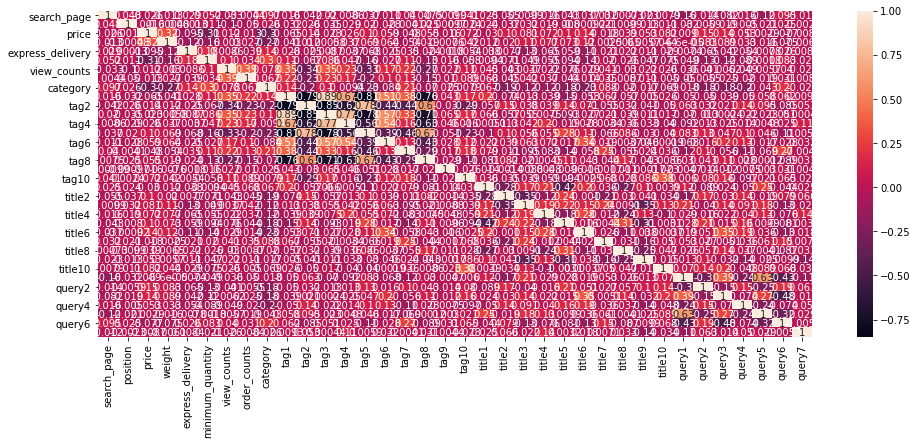

In [489]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

**Há correlação(positiva ou negativa) forte entre alguns os atributos** 

#### - Caso encontre a correlação, como é a dispersão entre eles?

*Há uma correlação média entre os atributos:

    - 'view_counts'/'order_counts'(positiva)
    - 'price'/'weight'(positiva)
    - 'price/'minimum_quantity'(negativa)
    
E uma correlação forte entre as tags:

    - 'entre algumas tags' (negativa)
   

In [466]:
# Importando o Plot.ly
import plotly.express as px

In [467]:
# view_counts vs order_counts (Número de cliques no produto e número de vezes que o produto foi comprado)
fig = px.scatter(data, x=data.view_counts, y=data.order_counts)
fig.show()

**É possível verificar que há um aglomerado mais próximo de 1000 - 2000 no número de vezes que o produto foi visto de 50 - 100 vezes o produto foi comprado**

In [468]:
# price vs weight (Preço versus o peso do produto)
fig = px.scatter(data, x=data.price, y=data.weight)
fig.show()

**Não é possível deduzir uma relação nos atributos**

In [469]:
# Preço vs Quantidade mínima no pedido
fig = px.scatter(data, x=data.price, y=data.minimum_quantity)
fig.show()

**Não é possível deduzir uma dispersão nos atributos**

#### - Quais são os meus atributos principais?

Para isso, utilizei o algoritmo Random Forest, para estimar a importância de cada atributo. Ele retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.

Retornou um erro, dizendo que os atributos não podem ser do tipo float nem do tipo string, portanto, irei retirar as colunas categóricas e transformar os dados de float para int.

In [490]:
data1 = data.drop(['query', 'title', 'concatenated_tags'], axis=1)

In [491]:
data1.dtypes

search_page           int64
position              int64
price                 int64
weight                int64
express_delivery      int64
minimum_quantity      int64
view_counts           int64
order_counts          int64
category              int64
tag1                float64
tag2                float64
tag3                float64
tag4                float64
tag5                float64
tag6                float64
tag7                float64
tag8                float64
tag9                float64
tag10               float64
title1              float64
title2              float64
title3              float64
title4              float64
title5              float64
title6              float64
title7              float64
title8              float64
title9              float64
title10             float64
query1              float64
query2              float64
query3              float64
query4              float64
query5              float64
query6              float64
query7              

In [492]:
float_cols = data1.drop(['category'], axis=1)

def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 
to_type(data1, float_cols, 'int64')

In [493]:
data1.dtypes

search_page         int64
position            int64
price               int64
weight              int64
express_delivery    int64
minimum_quantity    int64
view_counts         int64
order_counts        int64
category            int64
tag1                int64
tag2                int64
tag3                int64
tag4                int64
tag5                int64
tag6                int64
tag7                int64
tag8                int64
tag9                int64
tag10               int64
title1              int64
title2              int64
title3              int64
title4              int64
title5              int64
title6              int64
title7              int64
title8              int64
title9              int64
title10             int64
query1              int64
query2              int64
query3              int64
query4              int64
query5              int64
query6              int64
query7              int64
dtype: object

In [495]:
data1.to_csv('data3.csv', index=False)

In [496]:
#para setar o X eu utilizo o dataset menos o atributo alvo
X = data1.drop(['category'], axis=1)

#para setar o y eu escolho o atributo alvo
y = data1['category']

In [497]:
from sklearn.ensemble import RandomForestClassifier

# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10)

In [498]:
print(model.feature_importances_)

[0.00644182 0.02348852 0.14496887 0.0590659  0.00708335 0.09370715
 0.03371897 0.01965072 0.0247734  0.03334691 0.0225659  0.02311819
 0.0234492  0.02084265 0.02550202 0.01863698 0.00092414 0.03571191
 0.0256775  0.02692042 0.02803512 0.02089601 0.02293926 0.0206951
 0.01758828 0.0169423  0.01531415 0.02794286 0.01774705 0.02864355
 0.02678126 0.02663545 0.02776585 0.01996178 0.01251744]


In [499]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
price               0.144969
minimum_quantity    0.093707
weight              0.059066
tag10               0.035712
view_counts         0.033719
tag2                0.033347
query2              0.028644
title3              0.028035
title10             0.027943
query5              0.027766
title2              0.026920
query3              0.026781
query4              0.026635
title1              0.025677
tag7                0.025502
tag1                0.024773
position            0.023489
tag5                0.023449
tag4                0.023118
title5              0.022939
tag3                0.022566
title4              0.020896
tag6                0.020843
title6              0.020695
query6              0.019962
order_counts        0.019651
tag8                0.018637
query1              0.017747
title7              0.017588
title8              0.016942
title9              0.015314
query7              0.012517
express_delivery    0.007083
search_page         0.006442
tag9                0.000924

Gráfico com os a importância dos atributos em ordem decrescente, do mais importante para o menos importante.

<AxesSubplot:>

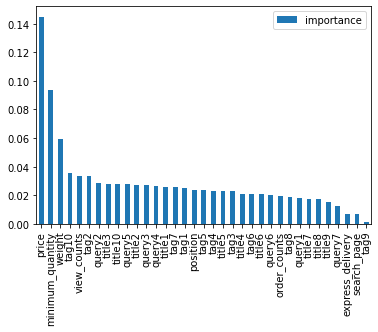

In [500]:
feature_importances.plot(kind='bar')

#### - Como os meus atributos se relacionam um com outro? E qual a sua distribuição?

Para verificar isso, veremos os gráficos de como os atributos se relacionam entre si, levando em consideração o nosso atributo alvo, que é a categoria. Para isso escolherei as 7 primeiras colunas na ordem de importância.

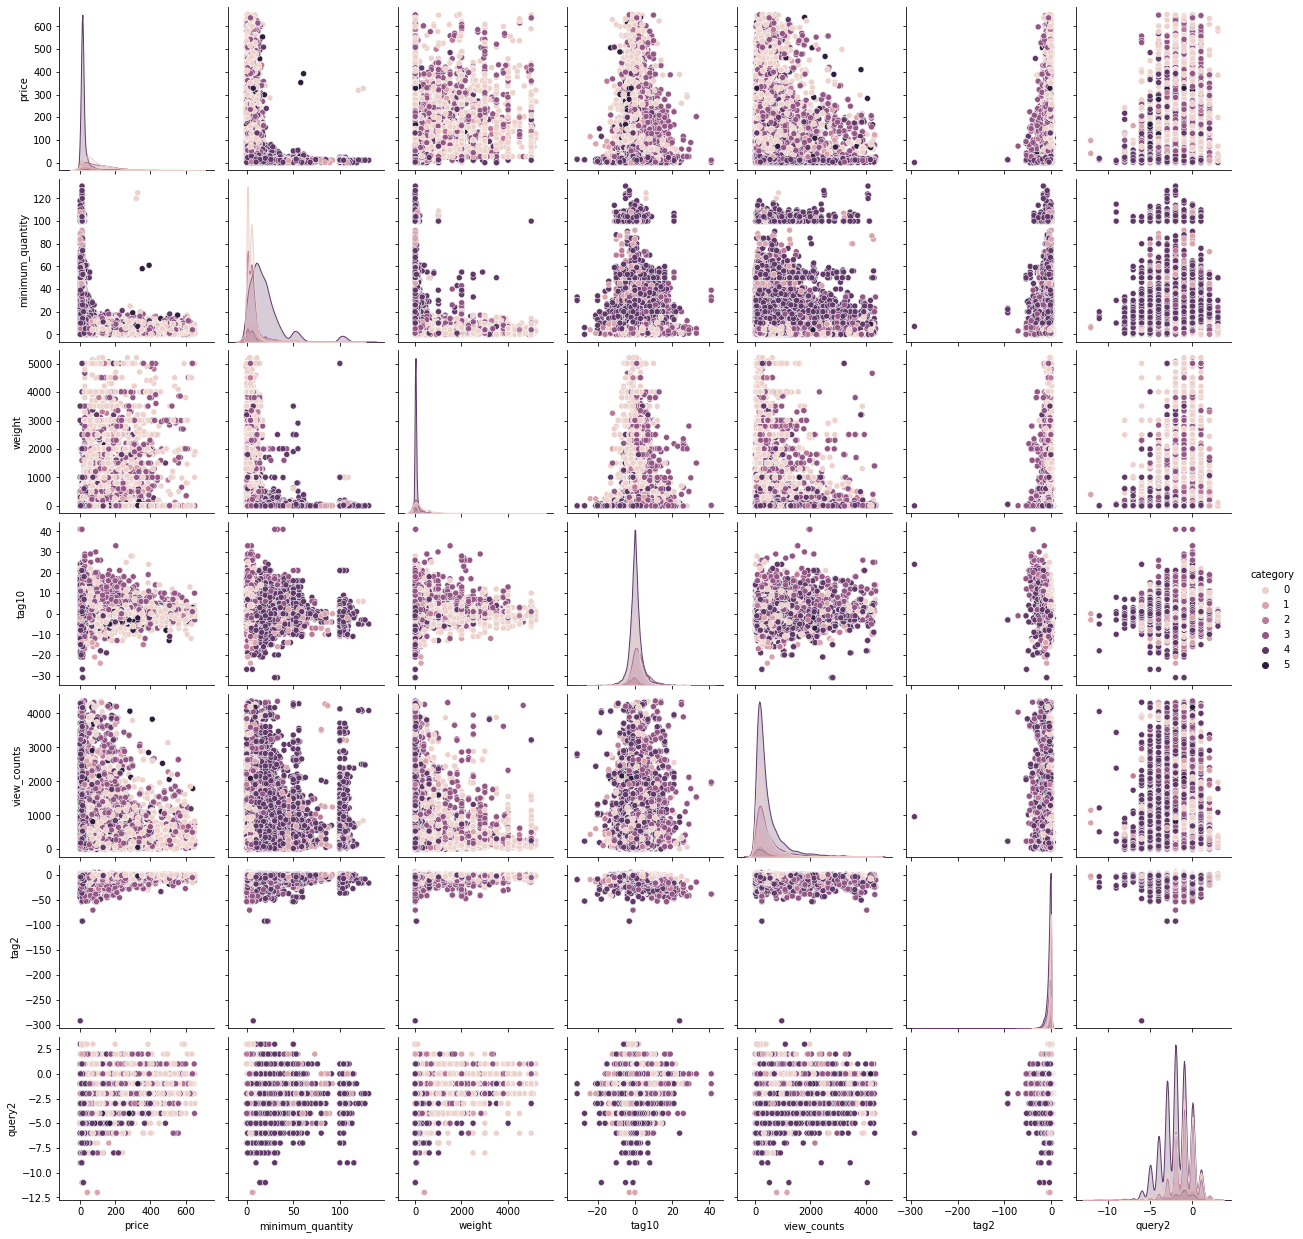

In [501]:
sns.pairplot(data1[['price', 'minimum_quantity', 'weight', 'tag10', 'view_counts', 'tag2',
                   'query2', 'category']], hue='category')

### 4 - Modelagem:

#### - Quais melhores modelos para resolver o meu problema?

Por se tratar de um modelo de aprendizagem supervisionado(irei utilizar as categorias da coluna 'category'), os modelos escolhidos foram:

- o SVM - Support Vector Machine. Que basicamente este algoritmo faz é, encontrar uma linha de separação, entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

- e  o modelo RandomForest, cria várias árvores de decisão aleatórias e as combina para obter uma predição com maior acurácia e mais estável.

- o KNN - K-Nearest Neighbors, quando utilizado para classificação, a saída pode ser calculada como a classe com a frequência mais alta das K-instâncias mais semelhantes. Em essência, cada instância vota em sua classe e a classe com mais votos é considerada a previsão.

## Modelo SVM-SVC

In [502]:
from sklearn import svm
from sklearn.svm import SVC #para modelos svc

#### - Utilização do framework optuna, para a hiperparâmetrização.

Para agilizar o processo e encontrar os melhores valores de parâmetros, escolhi o framework optuna, para obter melhores valores de clf_C e clf_gama.
 - o parâmetro gama define o quão longe a influência de um único exemplo de treinamento atinge, com valores baixos significando 'longe' e valores altos significando 'perto'. 
 -  o c se comporta como um parâmetro de regularização no SVM.

Após rodar vários modelos, percebi que o número alto de colunas, atrapalhou o treinamento do modelo, e o melhor score foi obtido escolhendo os 7 primeiros atributos em ordem de importância('price', 'minimum_quantity', 'weight', 'tag10', 'view_counts', 'tag2', 'query2')

In [793]:
#Obtendo os dados e a classe para treinamento

#X são os atributos selecionados menos o atributo alvo
X = data1.drop(['search_page', 'position', 'express_delivery','order_counts', 'category',
                'tag1','tag3', 'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9','title1',
                'title2', 'title3', 'title4', 'title5', 'title6', 'title7', 'title8',
                'title9', 'title10', 'query1',  'query3', 'query4', 'query5', 'query6',
                'query7'], axis=1)
#y é o atributo alvo
y = data1['category']

In [794]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

**kernel**

As funções do kernel são usadas para mapear o conjunto de dados original (linear / não linear) em um espaço dimensional mais alto com vista a torná-lo um conjunto de dados linear.

Para essa primeira modelagem foi escolhido o kernel rbf também conhecida como gaussiana.

In [503]:
import optuna # framework para hiperparametrização

In [ ]:
pipeline = Pipeline([
    ('clf', SVC(kernel = 'rbf'))
])


def objective(trial):
    
    pipeline.set_params(clf__C =trial.suggest_loguniform("clf__C", 0.1, 1e3), 
                        clf__gamma = trial.suggest_loguniform("clf__gamma", 1e-4, 50))  
    score =cross_val_score(pipeline, X, y, cv=3)
    accuracy = score.mean()
    
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

print("Melhor score: %0.3f" % study.best_trial.value)
print("Melhores parametros encontrados:")
print(study.best_trial.params)

**Observação: Existem vários tipos de kernel, porém não consegui testar o polinomial e o linear, pois não tenho poder computacional para realizá-los. O kernel sigmoid apresentou resultados similares ao rbf.***

#### - Através dos resultados do optuna, otimizar os parâmetros do modelo preditivo;

- Melhor score: 0.527
- Melhores parametros encontrados:
{'clf__C': 230.4050685544432, 'clf__gamma': 0.011363843360301605}


### Modelo treinado com a Padronização dos dados

Primeiramente, vou padronizar os dados.

In [795]:
from sklearn.pipeline import Pipeline #para criar pipelines e simplificar treino/teste
from sklearn.preprocessing import StandardScaler #para padronizar os dados

In [796]:
pip_stand_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf',probability=True, C=230.4050685544432,gamma=0.011363843360301605))])

In [797]:
pip_stand_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(C=230.4050685544432, gamma=0.011363843360301605,
                     probability=True))])

In [798]:
y_pred_stand_svm = pip_stand_svm.predict(X_test)

Para comparar os os pares de teste(evitar viés em treinar o mesmo dado)

In [799]:
pip_stand_svm.score(X_test,y_test)

0.6573184454254306

**Matriz de confusão**

É um tabela que mostra as frequências de classificação para cada classe do modelo.
Tem os seguintes análises:

*recall:* quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever

*acurácia:* é a razão entre o somatório das previsões corretas (verdadeiros positivos com verdadeiros negativos) sobre o somatório das previsões.

*precisão:* qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou?

*f-score:*  nos mostra o balanço entre a precisão e o recall de nosso modelo

**Observação: Com a Acurácia a gente consegue medir o QUANTO um classificador acerta, mas se quiser saber QUANDO ele acerta, é necessário avaliar a matriz de confusão**

In [854]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# plotar a matrix de confusão
import scikitplot as skplt 

Relatório de Classificação do Modelo SVM('rbf') - Padronizado:
               precision    recall  f1-score   support

           0     0.5467    0.7064    0.6164      2684
           1     1.0000    0.0012    0.0023       859
           2     0.0000    0.0000    0.0000       330
           3     0.6078    0.4340    0.5064      2092
           4     0.7269    0.8992    0.8039      5325
           5     0.5000    0.0038    0.0075       263

    accuracy                         0.6573     11553
   macro avg     0.5636    0.3408    0.3228     11553
weighted avg     0.6578    0.6573    0.6058     11553



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

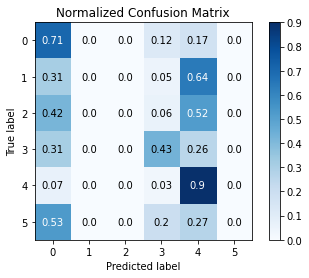

In [583]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_stand_svm, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação do Modelo SVM('rbf') - Padronizado:\n",
      classification_report(y_test, y_pred_stand_svm, digits=4))

Pode se observar que algumas classes tem um maior índice de f1-score, recall e precisão(0, 3 e 4), enquanto outras tem um valor bem pequeno e às vezes até nulo(1, 2 e 5). A consequência desse desequilíbrio é que o modelo terá uma tendência a dar muitos “alarmes falsos“, ou seja, na prática ele irá responder muito bem entradas para as classes majoritárias, mas terá um desempenho inferior para as minoriária e oclassificador tenderá a apresentar muitos falsos negativos.

Por isso é necessário fazer o balanceamento dos dados.
Será analisado a matriz de confusão com os dados balanceados, logo mais.

In [800]:
accuracy_pred_stand_svm = accuracy_score(y_test, y_pred_stand_svm)
accuracy_pred_stand_svm

0.6573184454254306

**Raiz quadrática média - RMSE**

RMSE (root mean squared error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses).

In [584]:
# calcula a métrica rmse
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

In [613]:
rmse_pred_stand_svm = (np.sqrt(mean_squared_error(y_test, y_pred_stand_svm)))
rmse_pred_stand_svm

1.7007846927033288

#### - Balanceamento dos dados para verificar se o score aumenta.

Como foi observado, os dados não estão balanceados, acredito que seja porque os números das categorias são muito distintas umas das outras, como vimos no gráfico de pizza das categorias. Será realizado uma análise da matriz de confusão com os dados balanceados,  ora undersampling, ora, oversampling.

Para isso irei fazer o balanceamento das categorias.

In [855]:
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

Escolhi o metódo Under-sampling para extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

Agora novamente vou rodar os testes que fiz acima e verificar a eficácia.

**o under-sampling é realizado em cima do conjunto de treino, e não de todos os dados. Isso é muito importante para não desconfigurarmos a característica de teste original.**

In [608]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_stand_svm, y_res_stand_svm = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_stand_svm).value_counts())

3    688
2    688
5    688
1    688
4    688
0    688
Name: category, dtype: int64


In [609]:
balance_stand_svm = pip_stand_svm.fit(X_res_stand_svm, y_res_stand_svm)

In [610]:
y_pred_res_stand_svm = balance_stand_svm.predict(X_test)

In [621]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res_stand_svm, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação do Modelo SVM('rbf') - Padronizado: UnderSampling\n", classification_report(y_test, y_pred_res_stand_svm, digits=4))

Relatório de Classificação do Modelo SVM('rbf') - Padronizado: UnderSampling
               precision    recall  f1-score   support

           0     0.6286    0.3651    0.4619      2684
           1     0.1361    0.1711    0.1516       859
           2     0.0990    0.4545    0.1626       330
           3     0.5810    0.4422    0.5022      2092
           4     0.8483    0.6838    0.7572      5325
           5     0.0950    0.5475    0.1620       263

    accuracy                         0.5182     11553
   macro avg     0.3980    0.4440    0.3663     11553
weighted avg     0.6574    0.5182    0.5669     11553

Acurácia: 0.5182



Pode se observar que agora com os dados estão balanceados, as classes que estavam com a precisão, recall e f1-score baixos aumentou. Porém a acurácia, diminuiu, mas por outro lado tivemos um aumento significativo na capacidade do modelo em detetectar a categoria corretamente.

In [801]:
accuracy_pred_res_stand_svm = accuracy_score(y_test, y_pred_res_stand_svm)
accuracy_pred_res_stand_svm

0.5182203756600018

In [614]:
rmse_pred_res_stand_svm = (np.sqrt(mean_squared_error(y_test, y_pred_res_stand_svm)))
rmse_pred_res_stand_svm

1.9425889594343853

Agora testando os dados utilizando o over_sampling 
Over-sampling: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. 

In [615]:
from imblearn.over_sampling import RandomOverSampler

In [617]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_stand_svm, y_ros_stand_svm = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_stand_svm).value_counts())

5    12434
4    12434
3    12434
2    12434
1    12434
0    12434
Name: category, dtype: int64


In [619]:
balance_stand_svm_ros = pip_stand_svm.fit(X_ros_stand_svm, y_ros_stand_svm)

In [620]:
y_pred_ros_stand_svm = balance_stand_svm_ros.predict(X_test)

In [622]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ros_stand_svm, normalize=True)

print("Relatório de Classificação do Modelo SVM('rbf') - Padronizado: OverSampling\n",
      classification_report(y_test, y_pred_ros_stand_svm, digits=4))

Relatório de Classificação do Modelo SVM('rbf') - Padronizado: OverSampling
               precision    recall  f1-score   support

           0     0.6364    0.3815    0.4771      2684
           1     0.1728    0.1804    0.1765       859
           2     0.0991    0.4061    0.1593       330
           3     0.6176    0.4455    0.5176      2092
           4     0.8557    0.7228    0.7837      5325
           5     0.0966    0.6198    0.1671       263

    accuracy                         0.5416     11553
   macro avg     0.4130    0.4594    0.3802     11553
weighted avg     0.6720    0.5416    0.5873     11553

Acurácia: 0.5416



Pode se observar que agora com os dados estão balanceados, as classes que estavam com a precisão, recall e f1-score baixos aumentou. Porém a acurácia(apesar de ser maior do que da acurácia do undersampling), diminuiu, mas por outro lado tivemos um aumento significativo na capacidade do modelo em detetectar a categoria corretamente.

In [802]:
accuracy_pred_ros_stand_svm = accuracy_score(y_test, y_pred_ros_stand_svm)
accuracy_pred_ros_stand_svm

0.5415909287630918

In [623]:
rmse_pred_ros_stand_svm = (np.sqrt(mean_squared_error(y_test,y_pred_ros_stand_svm)))
rmse_pred_ros_stand_svm 

1.9225459187389593

Não foi rodado o optuna novamente, foi atribuido o mesmo valor para C e gamma:

- Melhor score: 0.527
- Melhores parametros encontrados:
{'clf__C': 230.4050685544432, 'clf__gamma': 0.011363843360301605}


### Modelo treinado com a Normalização dos dados

Primeiramente, vou normalizar os dados.

In [632]:
from sklearn.preprocessing import MinMaxScaler

In [635]:
pip_normal_svm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', svm.SVC(kernel='rbf',C=230.4050685544432,gamma=0.011363843360301605))])

In [803]:
pip_normal_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', SVC(C=230.4050685544432, gamma=0.011363843360301605))])

In [804]:
y_pred_normal_svm = pip_normal_svm.predict(X_test)

In [805]:
pip_normal_svm.score(X_test,y_test)

0.6398338094001558

In [643]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_normal_svm, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação do Modelo SVM('rbf') - Normalizado:\n", classification_report(y_test, y_pred_normal_svm, digits=4))

/usr/local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Relatório de Classificação do Modelo SVM('rbf') - Normalizado:
               precision    recall  f1-score   support

           0     0.5225    0.6978    0.5975      2684
           1     0.0000    0.0000    0.0000       859
           2     0.0000    0.0000    0.0000       330
           3     0.6848    0.3136    0.4302      2092
           4     0.6937    0.9132    0.7885      5325
           5     0.0000    0.0000    0.0000       263

    accuracy                         0.6398     11553
   macro avg     0.3168    0.3208    0.3027     11553
weighted avg     0.5651    0.6398    0.5801     11553



Novamente, com os dados desbalanceados, ainda que a acurácia seja maior, as classes majoritárias podem interfer no modelo final. A acurácia padronizada apresentou um nível de acurácia melhor que com os dados normalizados.

In [808]:
accuracy_pred_svm_normal = accuracy_score(y_test, y_pred_normal_svm)
accuracy_pred_svm_normal

0.6398338094001558

In [807]:
rmse_pred_svm_normal = (np.sqrt(mean_squared_error(y_test, y_pred_normal_svm)))
rmse_pred_svm_normal

1.7789657446321845

In [644]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_normal_svm, y_res_normal_svm = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_normal_svm).value_counts())

3    688
2    688
5    688
1    688
4    688
0    688
Name: category, dtype: int64


In [645]:
balance_normal_svm = pip_normal_svm.fit(X_res_normal_svm, y_res_normal_svm)

In [646]:
y_pred_res_normal_svm = balance_normal_svm.predict(X_test)

In [649]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res_normal_svm , normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação do Modelo SVM('rbf') - Normalizado: Undersampling\n",
      classification_report(y_test, y_pred_res_normal_svm , digits=4))

Relatório de Classificação do Modelo SVM('rbf') - Normalizado: Undersampling
               precision    recall  f1-score   support

           0     0.6126    0.2798    0.3841      2684
           1     0.0904    0.2049    0.1255       859
           2     0.0893    0.5606    0.1540       330
           3     0.5628    0.4092    0.4738      2092
           4     0.8342    0.5463    0.6602      5325
           5     0.0992    0.4905    0.1650       263

    accuracy                         0.4333     11553
   macro avg     0.3814    0.4152    0.3271     11553
weighted avg     0.6403    0.4333    0.4968     11553



In [809]:
accuracy_pred_res_svm_normal = accuracy_score(y_test, y_pred_res_normal_svm)
accuracy_pred_res_svm_normal

0.4333073660521077

In [650]:
rmse_pred_res_normal_svm = (np.sqrt(mean_squared_error(y_test, y_pred_res_normal_svm)))
rmse_pred_res_normal_svm

2.043794720112314

In [651]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_normal_svm, y_ros_normal_svm = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_normal_svm).value_counts())

5    12434
4    12434
3    12434
2    12434
1    12434
0    12434
Name: category, dtype: int64


In [652]:
balance_normal_svm_ros = pip_stand_svm.fit(X_ros_normal_svm, y_ros_normal_svm)

In [654]:
y_pred_ros_normal_svm = balance_normal_svm_ros.predict(X_test)

In [655]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ros_normal_svm, normalize=True)

print("Relatório de Classificação do Modelo SVM('rbf') - Normalizado: OverSampling\n",
      classification_report(y_test, y_pred_ros_normal_svm, digits=4))

Relatório de Classificação do Modelo SVM('rbf') - Normalizado: OverSampling
               precision    recall  f1-score   support

           0     0.6384    0.3961    0.4888      2684
           1     0.1590    0.1688    0.1637       859
           2     0.0976    0.4000    0.1569       330
           3     0.6192    0.4369    0.5123      2092
           4     0.8531    0.7132    0.7769      5325
           5     0.0973    0.6274    0.1685       263

    accuracy                         0.5381     11553
   macro avg     0.4108    0.4571    0.3779     11553
weighted avg     0.6705    0.5381    0.5849     11553



In [810]:
accuracy_pred_ros_svm_normal = accuracy_score(y_test, y_pred_ros_normal_svm)
accuracy_pred_ros_svm_normal

0.538128624599671

In [656]:
rmse_pred_ros_normal_svm = (np.sqrt(mean_squared_error(y_test,y_pred_ros_normal_svm)))
rmse_pred_ros_normal_svm 

1.9340149289360538

## Modelo KNN

In [657]:
from sklearn.neighbors import KNeighborsClassifier

O modelo knn, pelo contrário do SVM, se mostrou mais eficiente com todos os atributos

In [811]:
#Obtendo os dados e a classe para treinamento

#X é todos os atributos que quero menos o atributo alvo
X = data1.drop(['category'], axis=1)
#y é o atributo alvo
y = data1['category']

In [812]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [704]:
from sklearn.model_selection import cross_val_score
# Criar uma lista de K para KNN
neighbors = list(range(1,50,2))
# lista vazia para os scores
cv_scores = [ ]
# cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [705]:
# para classificar erros
mse = [1-x for x in cv_scores]
# Determinando o melhor número de k
optimal_k = neighbors[mse.index(min(mse))]
print("O melhor número de k é: {}".format(optimal_k))

O melhor número de k é: 11


### Modelo treinado com a Padronização dos dados

Primeiramente, vou padronizar os dados.

In [813]:
pip_knn_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=11, n_jobs=-1))])

In [814]:
pip_knn_standard.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_jobs=-1, n_neighbors=11))])

In [815]:
y_pred_knn_standard = pip_knn_standard.predict(X_test)

In [725]:
pip_knn_standard.score(X_test,y_test)

0.7395481693066736

In [726]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_standard, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação KNN - Padronizado:\n",
      classification_report(y_test, y_pred_knn_standard, digits=4))

Relatório de Classificação KNN - Padronizado:
               precision    recall  f1-score   support

           0     0.6946    0.7541    0.7231      2684
           1     0.6065    0.2647    0.3686       850
           2     0.5586    0.1813    0.2737       342
           3     0.7749    0.6205    0.6891      2108
           4     0.7640    0.9116    0.8313      5283
           5     0.6606    0.3811    0.4834       286

    accuracy                         0.7395     11553
   macro avg     0.6765    0.5189    0.5615     11553
weighted avg     0.7296    0.7395    0.7211     11553



Aqui as classes majoritárias ainda apresentam um maior índice como no modelo de SVM, mas podemos observar que as classes minoritárias foram melhores representadas do que do modelo anterior.

In [816]:
accuracy_knn_standard = accuracy_score(y_test, y_pred_knn_standard)
accuracy_knn_standard

0.7395481693066736

In [727]:
rmse_knn_standard = (np.sqrt(mean_squared_error(y_test, y_pred_knn_standard)))
rmse_knn_standard

1.4658465007697503

In [728]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_knn_standard, y_res_knn_standard = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_knn_standard).value_counts())

5    665
3    665
1    665
4    665
2    665
0    665
Name: category, dtype: int64


In [729]:
balance_knn_standard_res = pip_knn_standard.fit(X_res_knn_standard, y_res_knn_standard)

In [730]:
y_pred_res_knn_standard = balance_knn_standard_res.predict(X_test)

In [731]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res_knn_standard, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação - Padronizado - Undersampling:\n",
      classification_report(y_test, y_pred_res_knn_standard, digits=4))

Relatório de Classificação - Padronizado - Undersampling:
               precision    recall  f1-score   support

           0     0.6459    0.4288    0.5155      2684
           1     0.1859    0.5224    0.2742       850
           2     0.1302    0.4415    0.2011       342
           3     0.6089    0.5237    0.5631      2108
           4     0.8406    0.5031    0.6295      5283
           5     0.1716    0.7483    0.2792       286

    accuracy                         0.4953     11553
   macro avg     0.4305    0.5280    0.4104     11553
weighted avg     0.6673    0.4953    0.5434     11553



Os dados já estavam relativamente representados, com o undersampling, podemos observar que as classes majoritárias, diminui bem seus índice e consequentemente a acurácia diminui 25%.

In [817]:
accuracy_knn_standard_under = accuracy_score(y_test, y_pred_res_knn_standard)
accuracy_knn_standard_under

0.49528261057733924

In [732]:
rmse_knn_standard_under = (np.sqrt(mean_squared_error(y_test, y_pred_res_knn_standard)))
rmse_knn_standard_under

1.9575915829605979

In [733]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_knn_standard, y_ros_knn_standard = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_knn_standard).value_counts())

5    12476
4    12476
3    12476
2    12476
1    12476
0    12476
Name: category, dtype: int64


In [734]:
balance_knn_standard_ros = pip_knn_standard.fit(X_ros_knn_standard, y_ros_knn_standard)

In [735]:
y_pred_knn_standard_ros = balance_knn_standard_ros.predict(X_test)

In [736]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_standard_ros, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação - Padronizado - Oversampling:\n",
      classification_report(y_test, y_pred_knn_standard_ros, digits=4))

Relatório de Classificação - Padronizado - Oversampling:
               precision    recall  f1-score   support

           0     0.7418    0.5931    0.6592      2684
           1     0.2687    0.6518    0.3805       850
           2     0.2232    0.5789    0.3222       342
           3     0.6565    0.6727    0.6645      2108
           4     0.8898    0.6050    0.7202      5283
           5     0.2946    0.7273    0.4194       286

    accuracy                         0.6203     11553
   macro avg     0.5124    0.6381    0.5277     11553
weighted avg     0.7327    0.6203    0.6517     11553



No oversampling, pode se observar que os dados balanceados ficaram mais estável e com isso a perda de acurácia foi menor do que no undersampling

In [818]:
accuracy_knn_standard_over = accuracy_score(y_test, y_pred_knn_standard_ros)
accuracy_knn_standard_over

0.6202717908768285

In [737]:
rmse_knn_standard_over = (np.sqrt(mean_squared_error(y_test, y_pred_knn_standard_ros)))
rmse_knn_standard_over

1.654111805514746

### Modelo treinado com a Normalização dos dados
Primeiramente, vou normalizar os dados.

In [738]:
pip_knn_normal = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=11, n_jobs=-1))])

In [819]:
pip_knn_normal.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', KNeighborsClassifier(n_jobs=-1, n_neighbors=11))])

In [820]:
y_pred_knn_normal = pip_knn_normal.predict(X_test)

In [741]:
pip_knn_normal.score(X_test,y_test)

0.6866614732104215

In [742]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_normal, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação KNN - Normalizado:\n",
      classification_report(y_test, y_pred_knn_normal, digits=4))

Relatório de Classificação KNN - Normalizado:
               precision    recall  f1-score   support

           0     0.6223    0.6814    0.6505      2684
           1     0.4818    0.1553    0.2349       850
           2     0.4022    0.1082    0.1705       342
           3     0.6551    0.5209    0.5803      2108
           4     0.7408    0.9012    0.8132      5283
           5     0.5241    0.2657    0.3527       286

    accuracy                         0.6867     11553
   macro avg     0.5710    0.4388    0.4670     11553
weighted avg     0.6632    0.6867    0.6599     11553



In [821]:
accuracy_knn_normal  = accuracy_score(y_test, y_pred_knn_normal)
accuracy_knn_normal

0.6866614732104215

In [743]:
rmse_knn_normal = (np.sqrt(mean_squared_error(y_test, y_pred_knn_normal)))
rmse_knn_normal

1.6131814426254494

In [744]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_knn_normal, y_res_knn_normal = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_knn_normal).value_counts())

5    665
3    665
1    665
4    665
2    665
0    665
Name: category, dtype: int64


In [745]:
balance_knn_normal_res = pip_knn_standard.fit(X_res_knn_normal, y_res_knn_normal)

In [746]:
y_pred_res_knn_normal = balance_knn_normal_res.predict(X_test)

In [747]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res_knn_normal, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação - Normalizado - Undersampling:\n",
      classification_report(y_test, y_pred_res_knn_normal, digits=4))

/usr/local/lib/python3.6/site-packages/scikitplot/metrics.py:115: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Relatório de Classificação - Normalizado - Undersampling:
               precision    recall  f1-score   support

           0     0.6712    0.4221    0.5183      2684
           1     0.1845    0.4918    0.2684       850
           2     0.1281    0.4123    0.1954       342
           3     0.6123    0.5161    0.5601      2108
           4     0.8389    0.5540    0.6674      5283
           5     0.1752    0.7552    0.2844       286

    accuracy                         0.5127     11553
   macro avg     0.4350    0.5253    0.4157     11553
weighted avg     0.6730    0.5127    0.5603     11553



In [822]:
accuracy_knn_normal_under  = accuracy_score(y_test, y_pred_res_knn_normal)
accuracy_knn_normal_under

0.5126806889985285

In [748]:
rmse_knn_normal_under = (np.sqrt(mean_squared_error(y_test, y_pred_res_knn_normal)))
rmse_knn_normal_under

1.905337889443956

In [749]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_knn_normal, y_ros_knn_normal = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_knn_normal).value_counts())

5    12476
4    12476
3    12476
2    12476
1    12476
0    12476
Name: category, dtype: int64


In [750]:
balance_knn_normal_ros = pip_knn_standard.fit(X_ros_knn_normal, y_ros_knn_normal)

In [751]:
y_pred_knn_normal_ros = balance_knn_normal_ros.predict(X_test)

In [752]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn_normal_ros, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação - Padronizado - Oversampling:\n",
      classification_report(y_test, y_pred_knn_normal_ros, digits=4))

Relatório de Classificação - Padronizado - Oversampling:
               precision    recall  f1-score   support

           0     0.7407    0.5917    0.6578      2684
           1     0.2671    0.6612    0.3805       850
           2     0.2297    0.5965    0.3317       342
           3     0.6589    0.6679    0.6634      2108
           4     0.8929    0.6016    0.7188      5283
           5     0.2871    0.7238    0.4111       286

    accuracy                         0.6186     11553
   macro avg     0.5127    0.6404    0.5272     11553
weighted avg     0.7342    0.6186    0.6506     11553



Para os dados normalizados a análise foi bem parecida com a dos dados padronizados. Só com o adendo de que no undersampling, a acurácia foi 10% maior do undersampling padronizado.

In [823]:
accuracy_knn_normal_over  = accuracy_score(y_test, y_pred_knn_normal_ros)
accuracy_knn_normal_over

0.6186271963992037

In [753]:
rmse_knn_normal_over = (np.sqrt(mean_squared_error(y_test, y_pred_knn_normal_ros)))
rmse_knn_normal_over

1.6648566298713192

## Random Forest

O Random Forest se mostrou mais eficiente com o número total de atributos.

In [824]:
#Obtendo os dados e a classe para treinamento

#X é todos os atributos que quero menos o atributo alvo
X = data1.drop(['category'], axis=1)
#y é o atributo alvo
y= data1['category']

In [825]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [756]:
def objective(trial):
  n_estimators = trial.suggest_int("n_estimators", 50, 400)
  max_depth = trial.suggest_int("max_depth", 30, 50)
  clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
  clf.fit(X_train, y_train)
  return clf.score(X_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, n_jobs=-1)


print("Melhor score: %0.3f" % study.best_trial.value)
print("Melhores parametros encontrados:")
print(study.best_trial.params)

[I 2020-10-07 10:42:23,797] A new study created in memory with name: no-name-48014de8-47b5-4a89-a702-7d8a09b184be
[I 2020-10-07 10:42:40,615] Trial 1 finished with value: 0.7948584783173201 and parameters: {'n_estimators': 92, 'max_depth': 46}. Best is trial 1 with value: 0.7948584783173201.
[I 2020-10-07 10:43:07,745] Trial 3 finished with value: 0.7978879944603133 and parameters: {'n_estimators': 265, 'max_depth': 45}. Best is trial 3 with value: 0.7978879944603133.
[I 2020-10-07 10:43:08,174] Trial 2 finished with value: 0.7974552064398858 and parameters: {'n_estimators': 263, 'max_depth': 31}. Best is trial 3 with value: 0.7978879944603133.
[I 2020-10-07 10:43:10,161] Trial 0 finished with value: 0.7971955336276292 and parameters: {'n_estimators': 277, 'max_depth': 38}. Best is trial 3 with value: 0.7978879944603133.
[I 2020-10-07 10:43:24,018] Trial 6 finished with value: 0.7946853631091492 and parameters: {'n_estimators': 88, 'max_depth': 41}. Best is trial 3 with value: 0.797887

Melhor score: 0.799
Melhores parametros encontrados:
{'n_estimators': 335, 'max_depth': 43}


Melhor score: 0.799

Melhores parametros encontrados:
{'n_estimators': 335, 'max_depth': 43}

### Padronizando os dados

In [826]:
pip_random_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators= 335, max_depth= 43))])

In [827]:
pip_random_standard.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=43, n_estimators=335))])

In [828]:
y_pred_random_standard = pip_random_standard.predict(X_test)

In [760]:
pip_random_standard.score(X_test,y_test)

0.7994460313338527

In [761]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_standard, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Padronizado:\n",
      classification_report(y_test, y_pred_random_standard, digits=4))

Relatório de Classificação Random Forest Padronizado:
               precision    recall  f1-score   support

           0     0.7110    0.8782    0.7858      2684
           1     0.9865    0.2561    0.4067       859
           2     0.9048    0.1727    0.2901       330
           3     0.8320    0.7008    0.7608      2092
           4     0.8271    0.9461    0.8826      5325
           5     0.9899    0.3726    0.5414       263

    accuracy                         0.7994     11553
   macro avg     0.8752    0.5544    0.6112     11553
weighted avg     0.8188    0.7994    0.7780     11553



A análise da matriz de confusão do modelo Random Forest, a diferença dos índices entre as classes majoritárias e minoritárias não foram tão discrepantes como no modelo SVM e ainda apresentou uma acurácia melhor. 

In [829]:
accuracy_random_standard  = accuracy_score(y_test, y_pred_random_standard)
accuracy_random_standard

0.7982342248766554

In [762]:
rmse_random_standard = (np.sqrt(mean_squared_error(y_test, y_pred_random_standard)))
rmse_random_standard

1.2779549576904385

In [763]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_random_standard, y_res_random_standard = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_random_standard).value_counts())

3    688
2    688
5    688
1    688
4    688
0    688
Name: category, dtype: int64


In [764]:
balance_random_standard_res = pip_random_standard.fit(X_res_random_standard, y_res_random_standard)

In [765]:
y_pred_random_standard_res = balance_random_standard_res.predict(X_test)

In [769]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_standard_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Padronizado Undersampling:\n",
      classification_report(y_test, y_pred_random_standard_res, digits=4))

Relatório de Classificação Random Forest Padronizado Undersampling:
               precision    recall  f1-score   support

           0     0.7205    0.6215    0.6673      2684
           1     0.3147    0.5111    0.3895       859
           2     0.2341    0.5788    0.3333       330
           3     0.6769    0.6300    0.6526      2092
           4     0.8959    0.7129    0.7940      5325
           5     0.2740    0.8783    0.4177       263

    accuracy                         0.6616     11553
   macro avg     0.5194    0.6554    0.5424     11553
weighted avg     0.7392    0.6616    0.6872     11553



Os índices das classes foram balanceadas e houve uma perda da acurácia de 13% apenas.

In [830]:
accuracy_random_standard_res  = accuracy_score(y_test, y_pred_random_standard_res)
accuracy_random_standard_res

0.661559768025621

In [770]:
rmse_random_standard_res = (np.sqrt(mean_squared_error(y_test, y_pred_random_standard_res)))
rmse_random_standard_res

1.6108725625820843

In [771]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_random_standard, y_ros_random_standard = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_random_standard).value_counts())

5    12434
4    12434
3    12434
2    12434
1    12434
0    12434
Name: category, dtype: int64


In [772]:
balance_random_standard_ros = pip_random_standard.fit(X_ros_random_standard, y_ros_random_standard)

In [773]:
y_pred_random_standard_ros = balance_random_standard_ros.predict(X_test)

In [774]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_standard_ros, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Padronizado Oversampling:\n",
      classification_report(y_test, y_pred_random_standard_ros, digits=4))

Relatório de Classificação Random Forest Padronizado Oversampling:
               precision    recall  f1-score   support

           0     0.7102    0.8882    0.7893      2684
           1     0.9505    0.3574    0.5195       859
           2     0.8544    0.2667    0.4065       330
           3     0.8292    0.7170    0.7690      2092
           4     0.8519    0.9286    0.8886      5325
           5     0.8846    0.5247    0.6587       263

    accuracy                         0.8104     11553
   macro avg     0.8468    0.6138    0.6719     11553
weighted avg     0.8230    0.8104    0.7974     11553



O Modelo Random Forest com os dados padronizados e com oversampling, apresentou ótima representatividade das classes, tanto majoritária, quanto minoritárias, e ainda houve uma melhora na acurácia.

In [831]:
accuracy_random_standard_ros  = accuracy_score(y_test, y_pred_random_standard_ros)
accuracy_random_standard_ros

0.810352289448628

In [775]:
rmse_random_standard_ros = (np.sqrt(mean_squared_error(y_test, y_pred_random_standard_ros)))
rmse_random_standard_ros

1.2429320648041635

### Normalizando os dados

Melhor score: 0.799

Melhores parametros encontrados:
{'n_estimators': 335, 'max_depth': 43}

In [776]:
pip_random_normal = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(n_estimators= 335, max_depth= 43))])

In [777]:
pip_random_normal.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=43, n_estimators=335))])

In [778]:
y_pred_random_normal = pip_random_normal.predict(X_test)

In [779]:
pip_random_normal.score(X_test,y_test)

0.7978014368562278

In [780]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_normal, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Normalizado:\n",
      classification_report(y_test, y_pred_random_normal, digits=4))

Relatório de Classificação Random Forest Normalizado:
               precision    recall  f1-score   support

           0     0.7095    0.8744    0.7834      2684
           1     0.9818    0.2515    0.4004       859
           2     0.9206    0.1758    0.2952       330
           3     0.8287    0.6984    0.7580      2092
           4     0.8257    0.9459    0.8818      5325
           5     0.9899    0.3726    0.5414       263

    accuracy                         0.7978     11553
   macro avg     0.8760    0.5531    0.6100     11553
weighted avg     0.8173    0.7978    0.7762     11553



In [832]:
accuracy_random_normal  = accuracy_score(y_test, y_pred_random_normal)
accuracy_random_normal

0.7978014368562278

In [781]:
rmse_random_normal = (np.sqrt(mean_squared_error(y_test, y_pred_random_normal)))
rmse_random_normal

1.2813370494503478

In [782]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res_random_normal, y_res_random_normal = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res_random_normal).value_counts())

3    688
2    688
5    688
1    688
4    688
0    688
Name: category, dtype: int64


In [783]:
balance_random_normal_res = pip_random_normal.fit(X_res_random_normal, y_res_random_normal)

In [784]:
y_pred_random_normal_res = balance_random_normal_res.predict(X_test)

In [786]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_normal_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Normalizado Undersampling:\n",
      classification_report(y_test, y_pred_random_normal_res, digits=4))

Relatório de Classificação Random Forest Normalizado Undersampling:
               precision    recall  f1-score   support

           0     0.7263    0.6278    0.6735      2684
           1     0.3283    0.5099    0.3995       859
           2     0.2383    0.5879    0.3392       330
           3     0.6932    0.6372    0.6640      2092
           4     0.8910    0.7264    0.8003      5325
           5     0.2777    0.8669    0.4207       263

    accuracy                         0.6705     11553
   macro avg     0.5258    0.6593    0.5495     11553
weighted avg     0.7425    0.6705    0.6945     11553



In [833]:
accuracy_random_normal_res  = accuracy_score(y_test, y_pred_random_normal_res)
accuracy_random_normal_res

0.6704752012464295

In [787]:
rmse_random_normal_res = (np.sqrt(mean_squared_error(y_test, y_pred_random_normal_res)))
rmse_random_normal_res

1.5957834164434617

In [788]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_ros_random_normal, y_ros_random_normal = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_ros_random_normal).value_counts())

5    12434
4    12434
3    12434
2    12434
1    12434
0    12434
Name: category, dtype: int64


In [789]:
balance_random_normal_ros = pip_random_normal.fit(X_ros_random_normal, y_ros_random_normal)

In [790]:
y_pred_random_normal_ros = balance_random_normal_ros.predict(X_test)

In [791]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_random_normal_ros, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação Random Forest Normalizado Oversampling:\n",
      classification_report(y_test, y_pred_random_normal_ros, digits=4))

Relatório de Classificação Random Forest Normalizado Oversampling:
               precision    recall  f1-score   support

           0     0.7075    0.8841    0.7860      2684
           1     0.9303    0.3574    0.5164       859
           2     0.8725    0.2697    0.4120       330
           3     0.8331    0.7204    0.7726      2092
           4     0.8526    0.9290    0.8892      5325
           5     0.9038    0.5361    0.6730       263

    accuracy                         0.8105     11553
   macro avg     0.8500    0.6161    0.6749     11553
weighted avg     0.8229    0.8105    0.7978     11553



Não houve diferença significativa do modelo com dados padronizados para os dados normalizados.

In [834]:
accuracy_random_normal_ros  = accuracy_score(y_test, y_pred_random_normal_ros)
accuracy_random_normal_ros

0.8105254046567991

In [792]:
rmse_random_normal_ros = (np.sqrt(mean_squared_error(y_test, y_pred_random_normal_ros)))
rmse_random_normal_ros

1.2478320158957292

# 5 - Validação do modelo:

### Relatório com os resultados de Acurácia e RMSE compilados

In [851]:
print("-------- Relatório dos Modelos SVM, KNN e Random Forest --------\n")

print("- Padronizado SVM              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_pred_stand_svm*100) , rmse_pred_stand_svm))
print("- Padronizado SVM UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_pred_res_stand_svm*100) , rmse_pred_res_stand_svm))
print("- Padronizado SVM OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_pred_ros_stand_svm*100) , rmse_pred_ros_stand_svm))
print("- Normalizado SVM              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_pred_svm_normal*100) , rmse_pred_svm_normal))
print("- Normalizado SVM UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_pred_res_svm_normal*100) , rmse_pred_res_normal_svm))
print("- Normalizado SVM OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}\n".format((accuracy_pred_ros_svm_normal*100) , rmse_pred_ros_normal_svm))

print("- Padronizado KNN              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_knn_standard*100) , rmse_knn_standard))
print("- Padronizado KNN UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_knn_standard_under*100) , rmse_knn_standard_under))
print("- Padronizado KNN OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_knn_standard_over*100) , rmse_knn_standard_over))
print("- Normalizado KNN              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_knn_normal*100) , rmse_knn_normal))
print("- Normalizado KNN UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_knn_normal_under*100) , rmse_knn_normal_under))
print("- Normalizado KNN OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}\n".format((accuracy_knn_normal_over*100) , rmse_knn_normal_over))

print("- Padronizado RaF              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_standard*100) , rmse_random_standard))
print("- Padronizado RaF UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_standard_res*100) , rmse_random_standard_res))
print("- Padronizado RaF OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_standard_ros*100) , rmse_random_standard_ros))
print("- Normalizado RaF              : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_normal*100) , rmse_random_normal))
print("- Normalizado RaF UnderSampling: Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_normal_res*100) , rmse_random_normal_res))
print("- Normalizado RaF OverSampling : Acurácia: {:.2f}% e RMSE: {:.4f}".format((accuracy_random_normal_ros*100) , rmse_random_normal_ros))

-------- Relatório dos Modelos SVM, KNN e Random Forest --------

- Padronizado SVM              : Acurácia: 65.73% e RMSE: 1.7008
- Padronizado SVM UnderSampling: Acurácia: 51.82% e RMSE: 1.9426
- Padronizado SVM OverSampling : Acurácia: 54.16% e RMSE: 1.9225
- Normalizado SVM              : Acurácia: 63.98% e RMSE: 1.7790
- Normalizado SVM UnderSampling: Acurácia: 43.33% e RMSE: 2.0438
- Normalizado SVM OverSampling : Acurácia: 53.81% e RMSE: 1.9340

- Padronizado KNN              : Acurácia: 73.95% e RMSE: 1.4658
- Padronizado KNN UnderSampling: Acurácia: 49.53% e RMSE: 1.9576
- Padronizado KNN OverSampling : Acurácia: 62.03% e RMSE: 1.6541
- Normalizado KNN              : Acurácia: 68.67% e RMSE: 1.6132
- Normalizado KNN UnderSampling: Acurácia: 51.27% e RMSE: 1.9053
- Normalizado KNN OverSampling : Acurácia: 61.86% e RMSE: 1.6649

- Padronizado RaF              : Acurácia: 79.82% e RMSE: 1.2780
- Padronizado RaF UnderSampling: Acurácia: 66.16% e RMSE: 1.6109
- Padronizado RaF Over

## Conclusão:

Pode se observar que o modelo que apresentou a melhor acurácia foi o Modelo Random Forest com os dados normalizados e com o balanceamento oversampling, também apresentou o rmse baixo (o modelo com os dados padronizados com oversampling apresentou uma performance bem parecida).

Cabe ressaltar que o RMSE é mais indicados para modelos de regressão, para modelos de classificação o mais indicado é vericar os parâmetros da área sob a curva (AUC), porém, não consegui aplicar essa métrica em meus modelos (precisava binarizar as classes, porém não obtive sucesso).

## Algumas Considerações

- A princípio, as colunas categóricas (query, title e concatenated_tags), haviam sido removidas, porém a performance de todos os modelos estavam bem baixas. Por isso a necessidade de transformá-las em número com o featurehasher.

- O modelo random forest apresentou performance maiores e melhores, conforme eu fui subdividindo as colunas categóricas, porém, fiquei apreensiva em dar overfitting no modelo.